# Case Study berdasarkan Data Account Payment di Modul 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import matplotlib.gridspec as gridspec
from matplotlib.ticker import EngFormatter
from matplotlib.ticker import FuncFormatter
import statistics

%matplotlib notebook

In [2]:
# retrieve AP data used in Modul 2 - Lead Transformation by Mastering Data
input = pd.read_csv('https://drive.google.com/uc?id=1tn7pP9Pj07MmlGjvPS3iiaShcxSUJyqa')
input.head()

,INVOICE DOCUMENT,ACTIVITY,DATETIME,PLANT,PO DOC,GR DOC,Clrng doc.,amtDocDc,amtLocDc,order
0,5101629334,GR,26/10/2018 0:00,1400,5200036445,5.017110e+09,2001011181,41871,41871,1
1,5101629334,TTDS,30/10/2018 0:00,1400,5200036445,5.017110e+09,2001011181,41871,41871,2
2,5101629334,INVOICE,28/11/2018 0:00,1400,5200036445,5.017110e+09,2001011181,41871,41871,4
3,5101629334,CLEARING,9/1/2019 0:00,1400,5200036445,5.017110e+09,2001011181,41871,41871,5
4,5101639246,GR,21/11/2018 0:00,1100,4100024077,5.017245e+09,1500143901,529200,529200,1


In [3]:
input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31777 entries, 0 to 31776
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INVOICE DOCUMENT  31777 non-null  int64  
 1   ACTIVITY          31777 non-null  object 
 2   DATETIME          31777 non-null  object 
 3   PLANT             31777 non-null  int64  
 4   PO DOC            31777 non-null  int64  
 5   GR DOC            31600 non-null  float64
 6   Clrng doc.        31777 non-null  int64  
 7   amtDocDc          31777 non-null  int64  
 8   amtLocDc          31777 non-null  int64  
 9   order             31777 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 2.4+ MB


In [4]:
# change 'DATETIME' column format from object to datetime64
input['DATETIME'] =  pd.to_datetime(input['DATETIME'], format='%d/%m/%Y %H:%M')

In [5]:
# perform pivot like we do when we use EXCEL
pivotOne = input.pivot(index=['INVOICE DOCUMENT','PLANT','amtDocDc'], columns='ACTIVITY', values='DATETIME')

In [6]:
pivotOne.head()

,,ACTIVITY,CLEARING,GR,INVOICE,TTDS
INVOICE DOCUMENT,PLANT,amtDocDc,,,,
5101579549,1400,3994,2019-01-16,NaT,2018-12-24,2018-08-16
5101579554,1100,59617,2019-01-09,NaT,2018-12-24,2018-08-16
5101606917,1400,5248080,2019-01-09,2018-09-18,2018-11-23,2018-09-26
5101606922,1400,85080000,2019-01-09,2018-09-13,2018-11-23,2018-09-26
5101606925,1400,121170000,2019-01-09,2018-09-20,2018-11-23,2018-09-26


In [7]:
# add columns 'DURATION', 'START' and 'END'
pivotOne['start'] = pivotOne.min(axis=1)
pivotOne['end'] = pivotOne.max(axis=1)
pivotOne['duration']= pivotOne['end'] - pivotOne['start']
pivotOne['duration']=pivotOne['duration'].dt.days

In [8]:
pivotOne.head()

,,ACTIVITY,CLEARING,GR,INVOICE,TTDS,start,end,duration
INVOICE DOCUMENT,PLANT,amtDocDc,,,,,,,
5101579549,1400,3994,2019-01-16,NaT,2018-12-24,2018-08-16,2018-08-16,2019-01-16,153
5101579554,1100,59617,2019-01-09,NaT,2018-12-24,2018-08-16,2018-08-16,2019-01-09,146
5101606917,1400,5248080,2019-01-09,2018-09-18,2018-11-23,2018-09-26,2018-09-18,2019-01-09,113
5101606922,1400,85080000,2019-01-09,2018-09-13,2018-11-23,2018-09-26,2018-09-13,2019-01-09,118
5101606925,1400,121170000,2019-01-09,2018-09-20,2018-11-23,2018-09-26,2018-09-20,2019-01-09,111


In [9]:
pivotOne = pivotOne.reset_index()

In [10]:
pivotOne['duration'].describe()

count    7959.000000
mean       49.074632
std        21.088874
min        20.000000
25%        40.000000
50%        44.000000
75%        51.000000
max       615.000000
Name: duration, dtype: float64

<IPython.core.display.Javascript object>


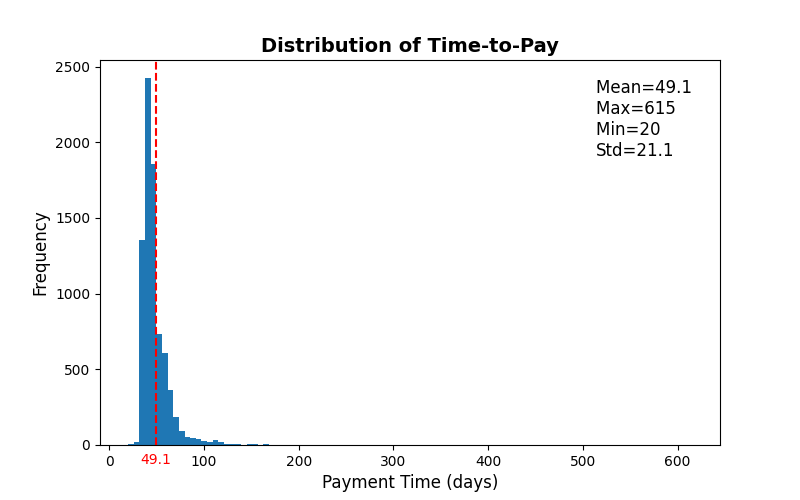

In [11]:
# create histogram to depict the distribution of Time-to-Pay
data=list(pivotOne['duration'])

fig, ax = plt.subplots(figsize=(8, 5));
ax.hist(data, bins = 100)
ax.set_title('Distribution of Time-to-Pay', fontsize=14, weight='bold')
ax.set_xlabel('Payment Time (days)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(.8, .95, 'Mean={:.1f} \nMax={:.0f} \nMin={:.0f} \nStd={:.1f}'.format(statistics.mean(data),
            max(data),min(data),statistics.stdev(data)), transform=ax.transAxes, ha="left", va="top", fontsize=12)
ax.axvline(statistics.mean(data), color='red', ls='--')
mean=statistics.mean(data)
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.text(mean, -0.04, "{:.1f}".format(mean), color="red", transform=trans, ha="center", va="center")
plt.show();

In [12]:
# create histogram to depict the distribution of Time-to-Pay by Plant
plant_names = list(pivotOne['PLANT'].unique())
plant_names.sort()
plant={}

for name in plant_names:
    plant[name]=list(pivotOne[pivotOne['PLANT']==name]['duration'])

<IPython.core.display.Javascript object>


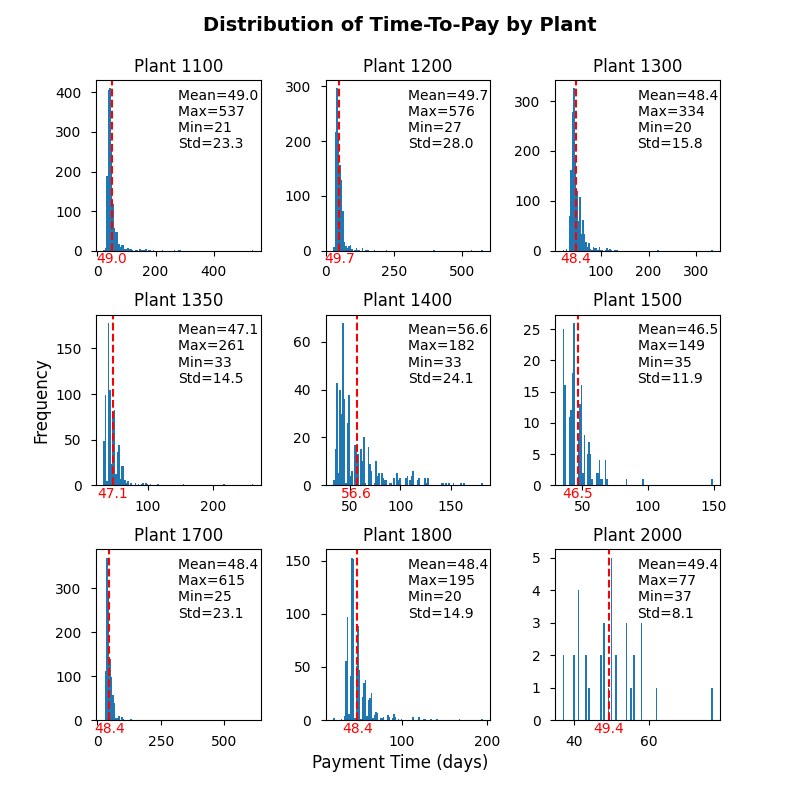

In [13]:
# create 3x3 grid of axis subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(8, 8))
axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

fig.suptitle('Distribution of Time-To-Pay by Plant', fontsize=14, weight='bold')
fig.text(0.5, 0.04, 'Payment Time (days)', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=12)

fig.tight_layout(h_pad=3, w_pad=2)
plt.subplots_adjust(top = 0.9, bottom=0.1, left= 0.12, right=0.9)
for n in range(0,len(axs)):
    data=plant[plant_names[n]]
    axs[n].hist(data, bins=100)
    axs[n].set_title('Plant {}'.format(plant_names[n]))
    axs[n].text(.5, .95, 'Mean={:.1f} \nMax={:.0f} \nMin={:.0f} \nStd={:.1f}'.format(statistics.mean(data),
            max(data),min(data),statistics.stdev(data)), transform=axs[n].transAxes, ha="left", va="top", fontsize=10)
    axs[n].axvline(statistics.mean(data), color='red', ls='--')
    axs[n].tick_params(axis='both', which='major', pad=7)
    mean=statistics.mean(data)
    trans = transforms.blended_transform_factory(axs[n].transData, axs[n].transAxes)
    axs[n].text(mean, -0.05, "{:.1f}".format(mean), color="red", transform=trans, ha="center", va="center", fontsize=10)


<IPython.core.display.Javascript object>


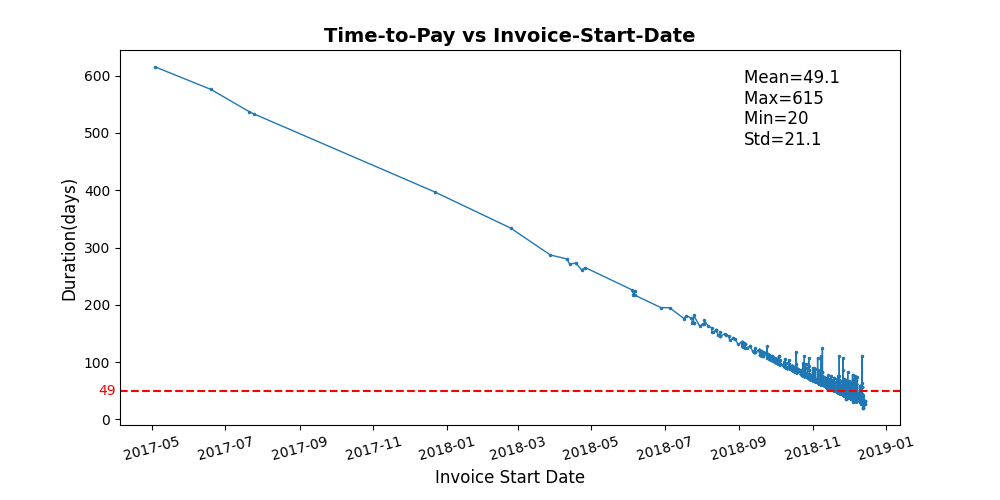

In [14]:
# create plot line of Time-to-Pay versus Invoice-Start-Date
data=pivotOne[['start','duration']].sort_values(by='start')
data={'start':list(data['start']), 'duration':data['duration']}

fig, ax = plt.subplots(figsize=(10, 5));
fig.tight_layout(h_pad=3, w_pad=2)
plt.xticks(rotation=15)
fig.subplots_adjust(top = 0.9, bottom=0.15, left= 0.12, right=0.9)
ax.plot(data['start'], data['duration'],  '.-', markersize=3, linewidth=1)
ax.axhline(statistics.mean(data['duration']), color='red', ls='--')
ax.text(.8, .95, 'Mean={:.1f} \nMax={:.0f} \nMin={:.0f} \nStd={:.1f}'.format(statistics.mean(data['duration']),
            max(data['duration']),min(data['duration']),statistics.stdev(data['duration'])), transform=ax.transAxes, ha="left", va="top", fontsize=12)
ax.set_title('Time-to-Pay vs Invoice-Start-Date', fontsize=14, weight='bold')
ax.set_xlabel('Invoice Start Date', fontsize=12)
ax.set_ylabel('Duration(days)', fontsize=12)
trans = transforms.blended_transform_factory(ax.transAxes, ax.transData)
mean=statistics.mean(data['duration'])
ax.text(-0.005,mean, "{:.0f}".format(mean), color="red", transform=trans, ha="right", va="center")

plt.show();

In [15]:
pivotOne.columns.values.tolist()

['INVOICE DOCUMENT',
 'PLANT',
 'amtDocDc',
 'CLEARING',
 'GR',
 'INVOICE',
 'TTDS',
 'start',
 'end',
 'duration']

In [16]:
pivotOne

ACTIVITY,INVOICE DOCUMENT,PLANT,amtDocDc,CLEARING,GR,INVOICE,TTDS,start,end,duration
0,5101579549,1400,3994,2019-01-16,NaT,2018-12-24,2018-08-16,2018-08-16,2019-01-16,153
1,5101579554,1100,59617,2019-01-09,NaT,2018-12-24,2018-08-16,2018-08-16,2019-01-09,146
2,5101606917,1400,5248080,2019-01-09,2018-09-18,2018-11-23,2018-09-26,2018-09-18,2019-01-09,113
3,5101606922,1400,85080000,2019-01-09,2018-09-13,2018-11-23,2018-09-26,2018-09-13,2019-01-09,118
4,5101606925,1400,121170000,2019-01-09,2018-09-20,2018-11-23,2018-09-26,2018-09-20,2019-01-09,111
...,...,...,...,...,...,...,...,...,...,...
7954,5101662379,1200,700000,2019-01-23,2018-11-26,2018-12-24,2018-12-16,2018-11-26,2019-01-23,58
7955,5101662380,1300,6750000,2019-01-23,2018-11-27,2018-12-24,2018-12-16,2018-11-27,2019-01-23,57
7956,5101662381,1200,12000000,2019-01-23,2018-10-26,2018-12-24,2018-12-16,2018-10-26,2019-01-23,89
7957,5101662390,1200,1009000,2019-01-16,2018-12-05,2018-12-19,2018-12-17,2018-12-05,2019-01-16,42


In [17]:
# example of how to use FuncFormatter
corel = {'amount':list(pivotOne['amtDocDc']), 'duration':list(pivotOne['duration'])}
meanx=statistics.mean(corel['amount'])
meany=statistics.mean(corel['duration'])

<IPython.core.display.Javascript object>


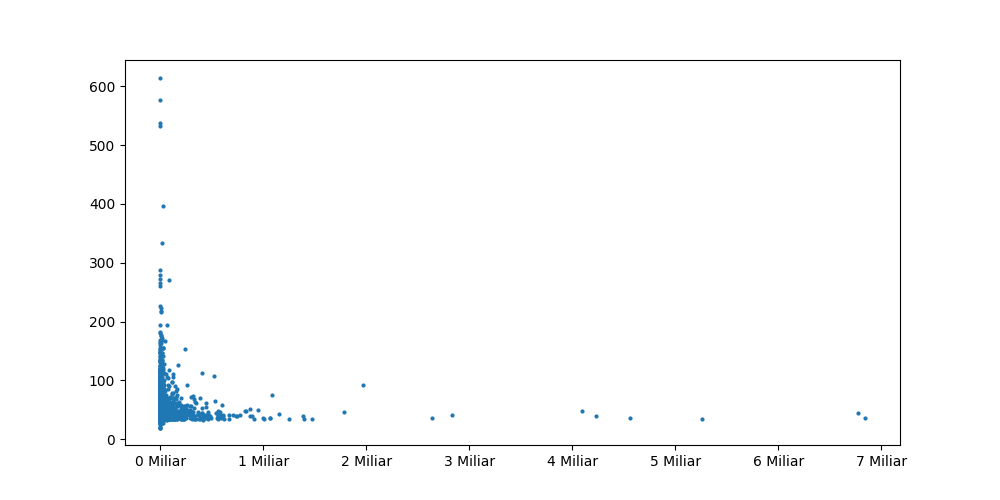

In [18]:
# just a small example
def miliar(x, pos):
    'The two args are the value and tick position'
    return '%.0f Miliar' % (x*1e-9)

formatter = FuncFormatter(miliar)
fig, ax = plt.subplots(figsize=(10, 5));
ax.scatter(corel['amount'], corel['duration'], s=4)
ax.xaxis.set_major_formatter(formatter)

plt.show();

<IPython.core.display.Javascript object>


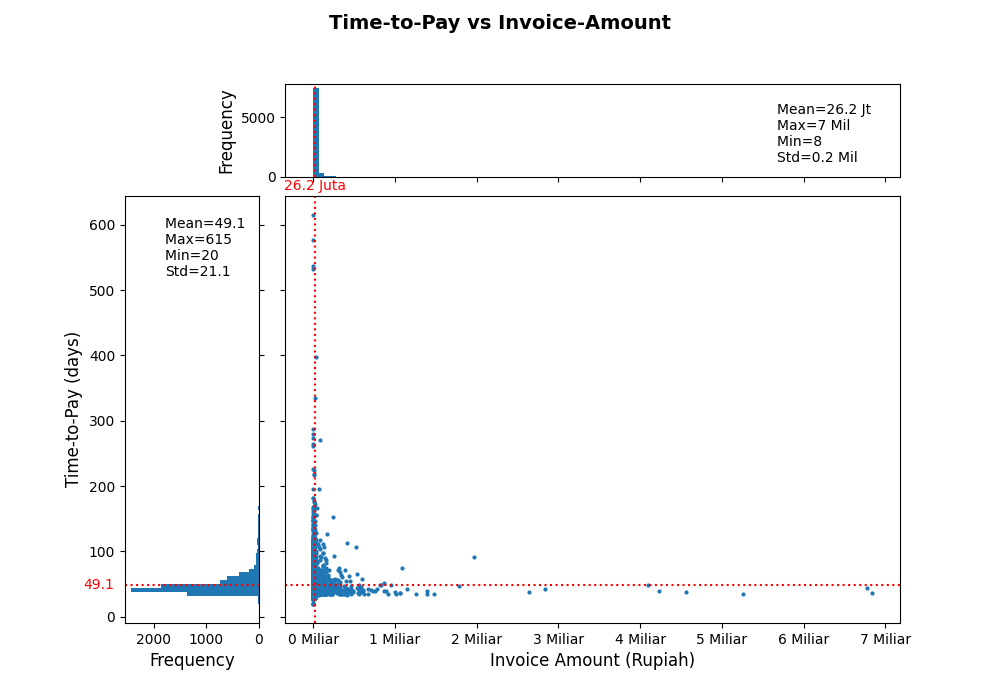

In [19]:
# create scatter plot of Time-To-Pay vs Invoice Amount surrounded on the sides by histogram of Time-To-Pay and Invoice-Amount
plt.figure(figsize=(10, 7))
gspec = gridspec.GridSpec(5, 5)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

plt.suptitle('Time-to-Pay vs Invoice-Amount', fontsize=14, weight='bold');

lower_right.scatter(corel['amount'], corel['duration'], s=4);
lower_right.xaxis.set_major_formatter(formatter)
lower_right.tick_params(labelleft=False)
lower_right.axhline(meany, color='red', ls='dotted')
lower_right.axvline(meanx, color='red', ls='dotted')
lower_right.set_xlabel('Invoice Amount (Rupiah)', fontsize=12);

top_histogram.hist(corel['amount'], bins=100);
top_histogram.xaxis.set_major_formatter(formatter)
top_histogram.tick_params(left=True, labelbottom=False)
top_histogram.set_ylabel('Frequency', fontsize=12);
top_histogram.axvline(meanx, color='red', ls='dotted');
trans_top = transforms.blended_transform_factory(top_histogram.transData, top_histogram.transAxes)
top_histogram.text(meanx, -0.1, "{:.1f} Juta".format(meanx/1e6), color="red", transform=trans_top, 
                   ha="center", va="center", fontsize=10);
top_histogram.text(.8, .8, 'Mean={:.1f} Jt \nMax={:.0f} Mil \nMin={:.0f} \nStd={:.1f} Mil'.format(statistics.mean(corel['amount'])/1e6,
            max(corel['amount'])/1e9, min(corel['amount']),statistics.stdev(corel['amount'])/1e9), transform=top_histogram.transAxes, ha="left", va="top", fontsize=10);


side_histogram.hist(corel['duration'], bins=100, orientation='horizontal')
side_histogram.invert_xaxis()
side_histogram.tick_params(right=True)
side_histogram.set_ylabel('Time-to-Pay (days)', fontsize=12);
side_histogram.set_xlabel('Frequency', fontsize=12);
side_histogram.axhline(meany, color='red', ls='dotted');
trans_side = transforms.blended_transform_factory(side_histogram.transAxes, side_histogram.transData)
side_histogram.text(-0.2, meany, "{:.1f}".format(meany), color="red", transform=trans_side, 
                    ha="center", va="center", fontsize=10);
side_histogram.text(.3, .95, 'Mean={:.1f} \nMax={:.0f} \nMin={:.0f} \nStd={:.1f}'.format(statistics.mean(corel['duration']),
            max(corel['duration']), min(corel['duration']),statistics.stdev(corel['duration'])), 
            transform=side_histogram.transAxes, ha="left", va="top", fontsize=10);